In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('Raga Recordings'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Raga Recordings/.DS_Store
Raga Recordings/Suha Sughrai/Bada Khyal- Aai Re Ratiyan Suhani - Tilwada - PVR.mp3
Raga Recordings/Suha Sughrai/Madhya Lay - Bari Umariya Beeti Jat - Jhaptal - PVR.mp3
Raga Recordings/Suha Sughrai/Sadra - Rang De Re Rangrejwa - Jhaptal Vilambit - PVR.mp3
Raga Recordings/Suha Sughrai/Madhya Lay - Baalam Aaye More Ghar - Jhaptal - PVR.mp3
Raga Recordings/Suha Sughrai/Chota Khyal  -Bhanak Kaan Pari Aali - Trital - PVR.mp3
Raga Recordings/Dev Gandhar/DevGandhar-Madhya Lay - Karat Barjori Mori Aali- Jhaptaal  - PVR.mp3
Raga Recordings/Dev Gandhar/DevGandhar-Sadra - Kadamb Ki Chaiyya Tale Bansi - Jhaptal Vilambit - PVR.mp3
Raga Recordings/Dev Gandhar/Chota Khyal - Baaje Jamuna Tat Bansi - Ektaal Drut - PVR.mp3
Raga Recordings/Dev Gandhar/Chota Khyal - Kathin Dagaria Sur Sadhan Ki- Trital - PVR.mp3
Raga Recordings/Dev Gandhar/Bada Khyal - Aan Milo Re Begi Piya - Ektaal Vilambit -PVR.mp3
Raga Recordings/Madhukauns/Madhya Lay - Daras Dikha Ja Rasiya -Jhaptal - PVR.mp3


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [3]:
!pip install ffmpeg-python

In [4]:
audio1= "Sindhura.mp3"

In [5]:
data,sr1=librosa.load(audio1)
ipd.Audio(audio1)

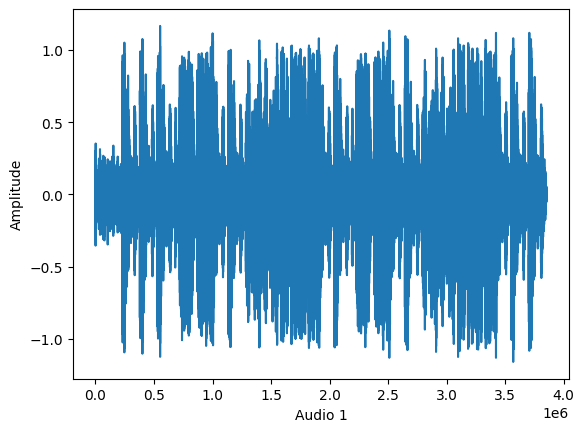

In [6]:
plt.plot(data)
plt.xlabel('Audio 1')
plt.ylabel('Amplitude')
plt.show()

In [7]:
# from scipy.io import wavfile as wav
# wavesr2, wave_audio=wav.read(audio1)

In [8]:
# wavesr2

In [9]:
# wave_audio

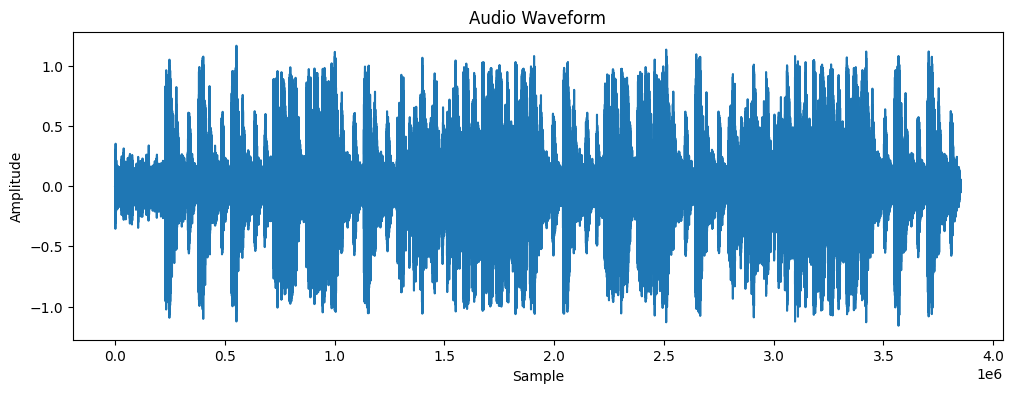

In [10]:
plt.figure(figsize=(12, 4))
plt.plot(data)  # Use the data already loaded with librosa
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.show()

Text(0.5, 1.0, 'Waveform')

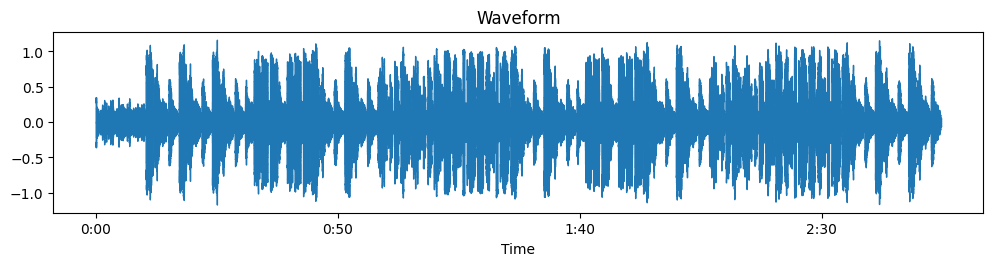

In [11]:
# Block for more informative visualization
plt.figure(figsize=(12, 8))

# Plot waveform
plt.subplot(3, 1, 1)
librosa.display.waveshow(data, sr=sr1)
plt.title('Waveform')


Text(0.5, 1.0, 'Linear-frequency Spectrogram')

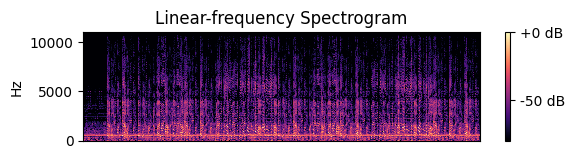

In [12]:
# Plot spectrogram
plt.subplot(3, 1, 2)
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
librosa.display.specshow(D, y_axis='linear', sr=sr1)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency Spectrogram')


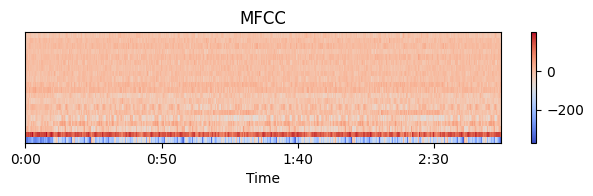

In [13]:
# Plot MFCC
plt.subplot(3, 1, 3)
mfccs = librosa.feature.mfcc(y=data, sr=sr1, n_mfcc=20)
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [14]:
# Display audio information
print(f"Sample rate: {sr1} Hz")
print(f"Duration: {len(data)/sr1:.2f} seconds")
print(f"Number of samples: {len(data)}")

Sample rate: 22050 Hz
Duration: 174.68 seconds
Number of samples: 3851712


In [15]:
folder_path = 'Raga Recordings'
file_paths = []
raga_names = []

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.wav') or file.endswith('.mp3'):
            file_paths.append(os.path.join(root, file))
            # Get raga name from directory name
            raga_name = os.path.basename(root)
            raga_names.append(raga_name)

print(f"Found {len(file_paths)} audio files across {len(set(raga_names))} ragas")


Found 642 audio files across 120 ragas


In [16]:
def features_extractor(file):
  try:
        audio, sample_rate = librosa.load(file, sr=None, duration=30)  # Limit to 30 seconds
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_scaled_features = np.mean(mfccs.T, axis=0)
        return mfccs_scaled_features
  except Exception as e:
        print(f"Error processing {file}: {e}")
        return None

In [17]:
extracted_features = []
for file_path, raga_name in zip(file_paths, raga_names):
    features = features_extractor(file_path)
    extracted_features.append([features, raga_name])

# Print the extracted features
print(extracted_features)

[[array([-3.09833588e+02,  1.75357071e+02, -1.82684994e+01, -1.81296177e+01,
       -3.46485209e+00, -1.68608818e+01, -1.36765404e+01, -5.17124081e+00,
       -1.36770105e+01, -1.52075815e+01,  6.04838133e+00,  9.62762737e+00,
       -4.46990639e-01,  1.15604341e+00, -3.93678546e+00, -7.03115404e-01,
        1.70229208e+00, -2.84745723e-01,  8.40026259e-01, -8.88076973e+00,
       -1.39584703e+01, -3.16378331e+00, -1.61867952e+00, -1.30125484e+01,
       -5.11176443e+00,  1.31424122e+01,  1.01720924e+01,  2.35637367e-01,
        7.18490720e-01, -1.72795308e+00,  2.45426154e+00,  4.08292627e+00,
        3.82438993e+00,  7.78887796e+00,  3.44665384e+00,  3.47349668e+00,
        4.56063080e+00,  6.83680832e-01,  4.35081291e+00,  3.27456832e+00],
      dtype=float32), 'Suha Sughrai'], [array([-254.65785  ,  166.96487  ,  -13.648019 ,    1.8820571,
        -11.243324 ,  -19.43875  ,  -16.314686 ,  -13.279571 ,
        -14.396043 ,  -16.682745 ,   -8.106135 ,    6.6856256,
          7.368045

In [18]:
import pandas as pd
features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
features_df.head()

feature         class
0  [-309.8336, 175.35707, -18.2685, -18.129618, -...  Suha Sughrai
1  [-254.65785, 166.96487, -13.648019, 1.8820571,...  Suha Sughrai
2  [-315.7454, 184.06996, -22.574192, -9.574992, ...  Suha Sughrai
3  [-295.85873, 165.72658, -6.3180895, -11.966484...  Suha Sughrai
4  [-250.97763, 193.98047, -30.581219, 6.892049, ...  Suha Sughrai

In [19]:
X=np.array(features_df['feature'].tolist())
y=np.array(features_df['class'].tolist())
le=LabelEncoder()
ti=le.fit_transform(y)
y=to_categorical(ti)

In [20]:
y.shape

(642, 120)

In [21]:
originallabels=le.classes_
print("Original labels: ", originallabels)
print("Encoded labels: ", np.unique(ti))

Original labels:  ['Abhogi Kanada' 'Adana' 'Aheer Bhairav' 'Alhaiya Bilawal' 'Bageshree'
 'Bahar' 'Bairagi' 'Bairagi Todi' 'Basant' 'Basant Mukhari' 'Bhairav'
 'Bhairavi' 'Bhatiyar' 'Bheem' 'Bheempalasi' 'Bhoopali' 'Bhupal Todi'
 'Bihag' 'Bihagda' 'Bilaskhani Todi' 'Chandrakauns' 'Charukeshi'
 'Chhayanut' 'Darbari Kanada' 'Des' 'Deshkar' 'Desi' 'Dev Gandhar'
 'Devgiri Bilawal' 'Devshree' 'Dhanashree (Bhairavi Ang)' 'Dhani' 'Durga'
 'Gaud Malhar' 'Gaud Sarang' 'Gauri (Bhairav Ang)' 'Gopika Basant'
 'Gorakh Kalyan' 'Gunkali' 'Gurjari Todi' 'Hameer' 'Hansdhwani'
 'Hanskinkini' 'Harikauns' 'Hemant' 'Hemshree' 'Hindol' 'Jaijaivanti'
 'Jaldhar Kedar' 'Jaunpuri' 'Jayat' 'Jhinjhoti' 'Jog' 'Jogeshwari'
 'Jogiya' 'Jogkauns' 'Kafi' 'Kalawati' 'Kamod'
 'Kaushik Dhwani (Bhinn Shadj)' 'Kausi Kanada' 'Kedar' 'Khamaj'
 'Khambavati' 'Kirwani' 'Komal Rishabh Asawari' 'Lalit'
 'Lanka Dahan Sarang' 'Madhukauns' 'Madhumad Sarang' 'Madhuvanti'
 'Malgunji' 'Malhar' 'Malkauns' 'Mand' 'Maru Bihag' 'Marwa' 'Meg

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=127)

In [23]:
X_train.shape

(513, 40)

In [24]:
y_train.shape

(513, 120)

In [25]:
X_train.shape

(513, 40)

In [26]:
y_test.shape

(129, 120)

In [27]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [28]:
num_labels = y.shape[1]
print(num_labels)

120


In [29]:
X_train_flat = np.array([x.flatten() for x in X_train])
X_test_flat = np.array([x.flatten() for x in X_test])


# Test Set Accuracy vs. Train Set Accuracy

In machine learning, these two metrics help evaluate how well your model is performing:

## Test Set Accuracy
- Measures how accurately your model predicts on **unseen data** (the test set)
- This is the most important metric as it shows how well your model will perform on new, real-world examples
- Calculated in the code using `model.evaluate(X_test, y_test)`
- A good test accuracy indicates your model can generalize well

## Train Set Accuracy
- Measures how accurately your model predicts on the **data it was trained with**
- Calculated using `model.evaluate(X_train, y_train)`
- This is less important for real-world performance but helps diagnose model issues

## What These Tell You Together
- **Similar accuracies**: Model is likely generalizing well
- **Train >> Test**: Model might be overfitting (memorizing training data rather than learning patterns)
- **Both low**: Model might be underfitting (too simple to capture patterns)

In your raga classification model, these metrics show how well the neural network can identify different ragas based on their extracted audio features.

In [30]:
from tensorflow.keras import layers,models
model = models.Sequential()
model.add(layers.Conv1D(32, kernel_size=5, activation='relu', input_shape=(X_train_flat.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=1))
model.add(layers.Conv1D(64, kernel_size=5, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=1))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_labels, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/Users/atharvdwivedi/raag_saarthi_backend/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-08 20:37:32.121763: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-05-08 20:37:32.121931: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-05-08 20:37:32.121940: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
I0000 00:00:1746716852.122247 8076646 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1746716852.122283 8076646 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 36, 32)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 36, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 32, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 32, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 120)            │        15,480 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 288,248 (1.10 MB)

 Trainable params: 288,248 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='Adam')

In [33]:
from keras.callbacks import ModelCheckpoint
from datetime import datetime
num_epochs = 50
num_batch_size = 4
checkpointer = ModelCheckpoint(filepath='saved_model.keras',verbose=1,save_best_only=True)
start = datetime.now()
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test),  verbose=1,callbacks=[checkpointer])
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/50


2025-05-08 20:37:32.538680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0126 - loss: 8.1692
Epoch 1: val_loss improved from inf to 5.01037, saving model to saved_model.keras
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.0127 - loss: 8.1621 - val_accuracy: 0.0155 - val_loss: 5.0104
Epoch 2/50
126/129 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0173 - loss: 5.8506
Epoch 2: val_loss improved from 5.01037 to 4.71198, saving model to saved_model.keras
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0175 - loss: 5.8532 - val_accuracy: 0.0465 - val_loss: 4.7120
Epoch 3/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0498 - loss: 5.6302
Epoch 3: val_loss improved from 4.71198 to 4.36174, saving model to saved_model.keras
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0497 - loss: 5.6324 - val_accuracy: 0.0853 - val_loss: 4.3617
Epoch 4/50
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0435 - loss: 5.5872
Epoch 4: val_loss did not improve from 4.36174
129/129 

In [34]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f"test set accuracy: {test_accuracy[1] * 100}%")

train_accuracy=model.evaluate(X_train,y_train,verbose=0)
print(f"train set accuracy: {train_accuracy[1] * 100}%")

test set accuracy: 36.43410801887512%
train set accuracy: 96.1013674736023%


In [35]:
file ="bhairavi30.wav"
x,sr1 = librosa.load(file)
ipd.Audio(x,rate=sr1)

In [36]:
prediction_feature = features_extractor(file)
prediction_feature = prediction_feature.reshape(1,-1)
predicted_probabilities = model.predict(prediction_feature)
predicted_class_label = np.argmax(predicted_probabilities)
predicted_class_label = np.array([predicted_class_label])
prediction_class = le.inverse_transform(predicted_class_label)
print("Predicted class:", prediction_class[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted class: Bhairavi
